# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [100]:
import cv2
import os
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('image', cmap='gray')

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [101]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

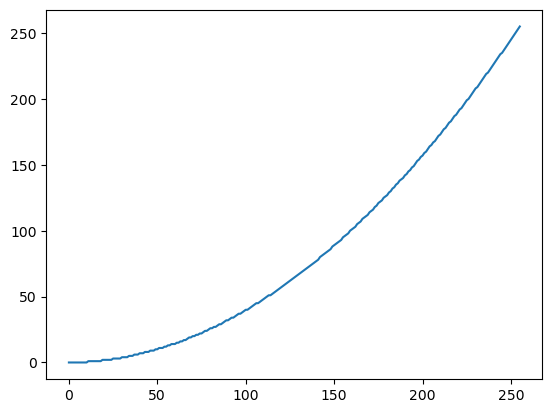

In [102]:
import lut
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [103]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

(256, 256)


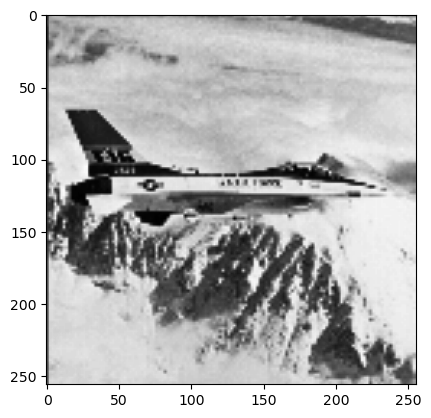

In [105]:
image = cv2.imread('jet.bmp',cv2.IMREAD_GRAYSCALE)
print(image.shape)
scaled_image = cv2.LUT(image, lut.kwadratowa)
plt.imshow(scaled_image)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [106]:
def scale_image(image, scale_function):
    scaled_image = cv2.LUT(image, scale_function)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    ax3.set_aspect('equal')
    
    ax1.plot(scale_function)
    ax2.imshow(image)
    ax3.imshow(scaled_image)
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

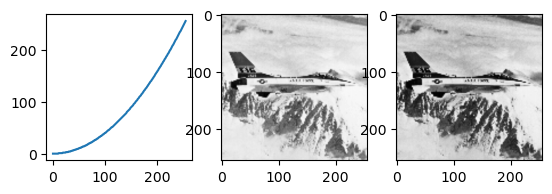

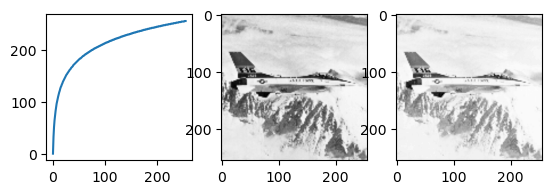

In [107]:
scale_image(image,lut.kwadratowa)
scale_image(image,lut.log)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

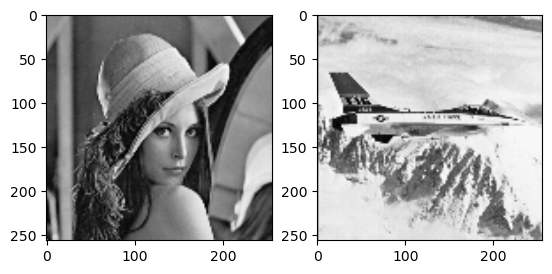

(256, 256)


In [108]:
img1 = cv2.imread('lena.bmp',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('jet.bmp',cv2.IMREAD_GRAYSCALE)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img1)
ax2.imshow(img2)
plt.show()
print(img1.shape)

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

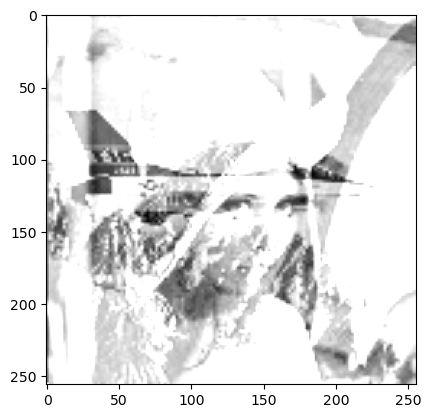

In [109]:
sum_image = cv2.add(img1,img2)
plt.imshow(sum_image)
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

[[208 257 306 ... 289 274 274]
 [208 257 306 ... 289 274 274]
 [204 253 303 ... 262 250 250]
 ...
 [120 172 225 ... 209 225 225]
 [118 170 223 ... 216 229 229]
 [272 272 223 ... 224 234 234]]


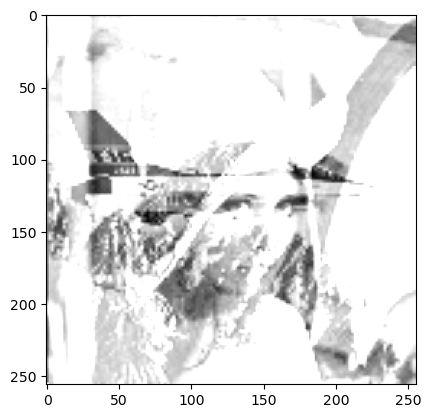

In [119]:
sum_image2 = cv2.add(img1.astype("uint16"), img2.astype("uint16"))
print(sum_image2)
for i in range(len(sum_image2)):
    for j in range(len(sum_image[i])):
        sum_image2[i][j]=min(sum_image2[i][j], 255)

plt.imshow(sum_image2.astype("uint8"))
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

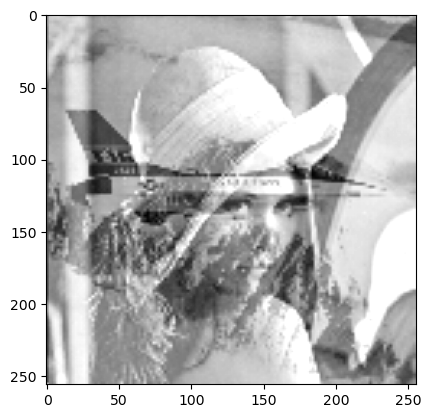

In [120]:
weighted_image = cv2.addWeighted(img1, 0.7, img2, 0.7, 0)
plt.imshow(weighted_image)
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

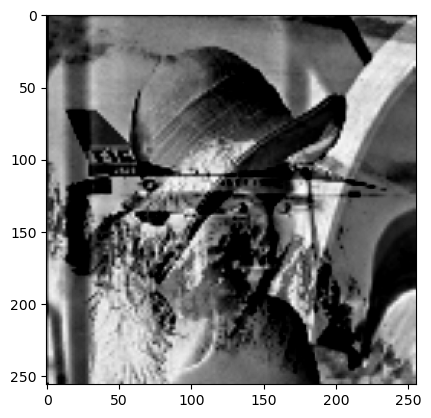

In [121]:
substract_image = cv2.subtract(img2, img1)
plt.imshow(substract_image)
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

[[  64   15  -34 ...  -31  -46  -46]
 [  64   15  -34 ...  -31  -46  -46]
 [  64   13  -37 ...  -84 -106 -106]
 ...
 [ -64 -116 -169 ...  -97 -107 -107]
 [ -60 -114 -169 ...  -90  -99  -99]
 [   0    0 -169 ...  -82  -90  -90]]
[[ 64  15  34 ...  31  46  46]
 [ 64  15  34 ...  31  46  46]
 [ 64  13  37 ...  84 106 106]
 ...
 [ 64 116 169 ...  97 107 107]
 [ 60 114 169 ...  90  99  99]
 [  0   0 169 ...  82  90  90]]


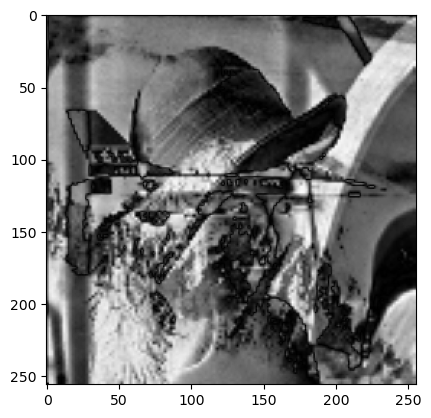

In [134]:
scaled_img1 = img1.astype("int16")
scaled_img2 = img2.astype("int16")
substract_image = cv2.subtract(scaled_img1,scaled_img2)
print(substract_image)
substract_image = np.abs(substract_image)
print(substract_image)
# substract_image = np.abs(substract_image)
# for i in range(len(substract_image)):
#     for j in range(len(substract_image[i])):
#         substract_image[i][j]=
plt.imshow(substract_image)
plt.show()


### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

[[ 9792. 16456. 23120. ... 20640. 18240. 18240.]
 [ 9792. 16456. 23120. ... 20640. 18240. 18240.]
 [ 9380. 15960. 22610. ... 15397. 12816. 12816.]
 ...
 [ 2576.  4032.  5516. ...  8568.  9794.  9794.]
 [ 2581.  3976.  5292. ...  9639. 10660. 10660.]
 [18496. 18496.  5292. ... 10863. 11664. 11664.]]
[[38.25       64.28125    90.3125     ... 80.625      71.25
  71.25      ]
 [38.25       64.28125    90.3125     ... 80.625      71.25
  71.25      ]
 [36.640625   62.34375    88.3203125  ... 60.14453125 50.0625
  50.0625    ]
 ...
 [10.0625     15.75       21.546875   ... 33.46875    38.2578125
  38.2578125 ]
 [10.08203125 15.53125    20.671875   ... 37.65234375 41.640625
  41.640625  ]
 [72.25       72.25       20.671875   ... 42.43359375 45.5625
  45.5625    ]]


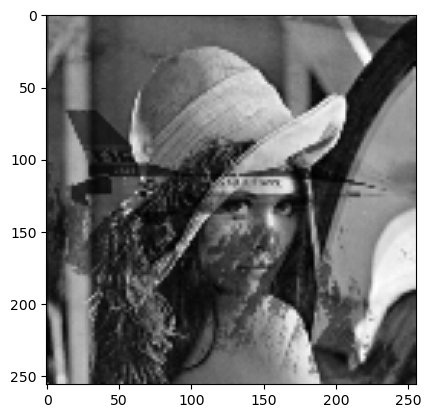

In [139]:
scaled_img1 = img1.astype("float64")
scaled_img2 = img2.astype("float64")
multiply_image = cv2.multiply(scaled_img1,scaled_img2)
print(multiply_image)
multiply_image = multiply_image/(256)
print(multiply_image)
plt.imshow(multiply_image.astype("uint8"))
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [142]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

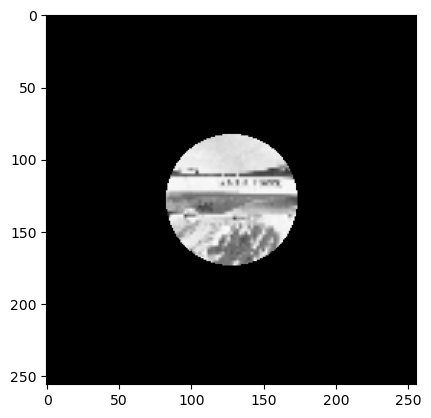

In [149]:
maska = cv2.imread('kolo.bmp',cv2.IMREAD_GRAYSCALE).astype("bool").astype("uint8")

multiply_res = cv2.multiply(img2, maska)
plt.imshow(multiply_res)

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

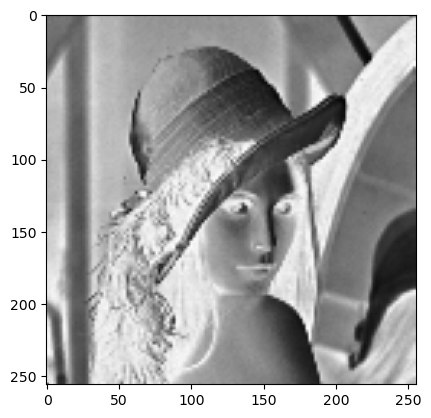

In [150]:
negative_image = cv2.bitwise_not(img1)
plt.imshow(negative_image)

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [ ]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.